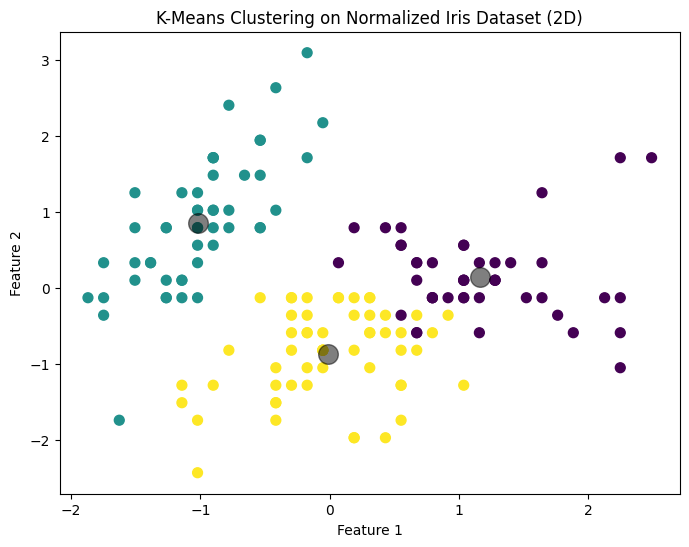

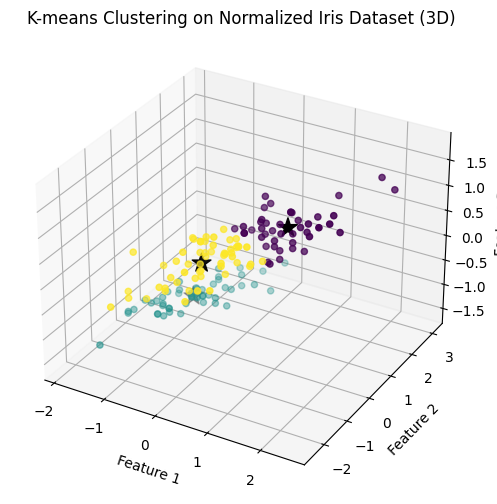

Adjusted Rand Index: 0.5923326221845838


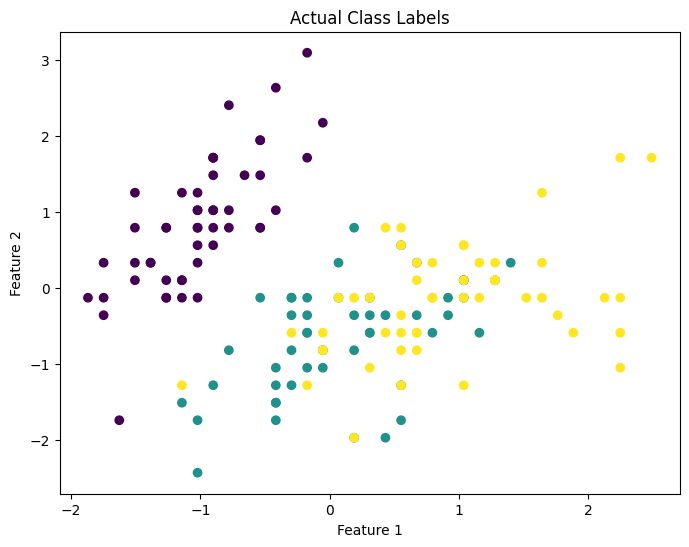

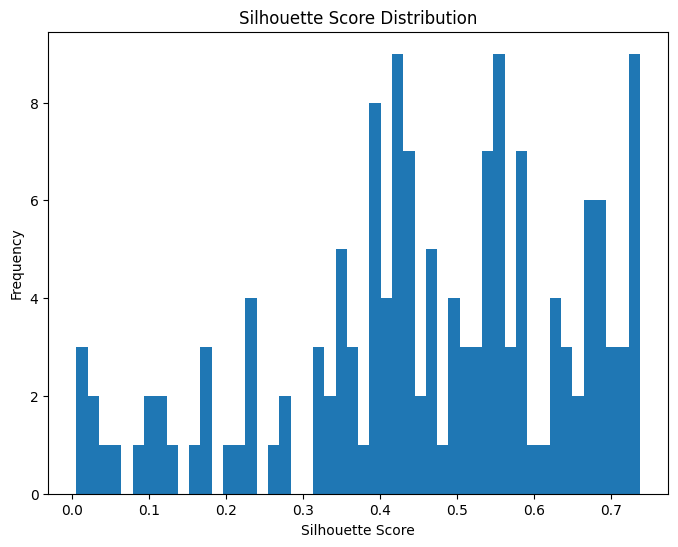

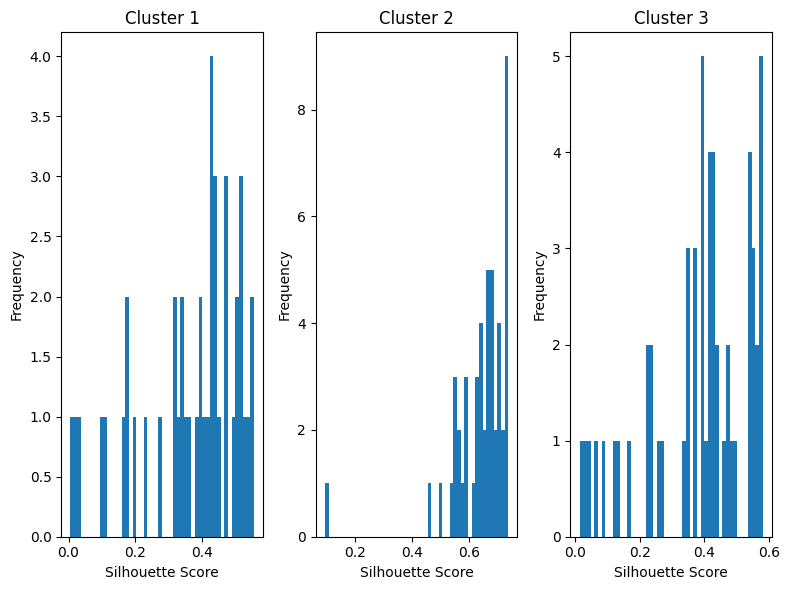

In [5]:
# Normalize Iris dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_samples

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Normalize the Iris dataset
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Define the k-means clustering function
def kmeans(X, k, max_iters=1000, plot_steps=False):
    idx = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[idx, :]

    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

        if plot_steps:
            plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
            plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
            plt.show()

    return centroids, labels

# Apply k-means clustering with k=3
centroids, labels = kmeans(X_normalized, 3, max_iters=150)

# Visualize the 2D cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering on Normalized Iris Dataset (2D)')
plt.show()

# 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_normalized[:, 0], X_normalized[:, 1], X_normalized[:, 2], c=labels)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='black', marker='*', s=200)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('K-means Clustering on Normalized Iris Dataset (3D)')
plt.show()

# Compare cluster assignments with actual class labels
print("Adjusted Rand Index:", adjusted_rand_score(y, labels))

# Visualize the actual class labels
plt.figure(figsize=(8, 6))
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Actual Class Labels')
plt.show()

# Calculate the silhouette scores
silhouette_values = silhouette_samples(X_normalized, labels)

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.hist(silhouette_values, bins=50)
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.title('Silhouette Score Distribution')
plt.show()

# Plot the silhouette scores for each cluster
silhouette_values_by_cluster = [silhouette_values[labels == i] for i in range(3)]
plt.figure(figsize=(8, 6))
for i, values in enumerate(silhouette_values_by_cluster):
    plt.subplot(1, 3, i+1)
    plt.hist(values, bins=50)
    plt.title(f'Cluster {i+1}')
    plt.xlabel('Silhouette Score')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()